<a href="https://colab.research.google.com/github/priyanka-senthil/Detect_heavy_drinking/blob/main/Detect_Heavy_Drinking_using_P_Entropy_and_Complexity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [240]:
# Set working directory
%cd /content/drive/MyDrive/Project 2/

/content/drive/MyDrive/Project 2


In [194]:
# Include libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import math
import os
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [195]:
#Read the main dataset
df_acc = pd.read_csv('all_accelerometer_data_pids_13.csv')

In [196]:
def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts)

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*(m-1)):, :]
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:])

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

# Define a function to calculate permutation entropy and complexity
def calculate_entropy_and_complexity(df_segment, axis):
    op = ordinal_patterns(df_segment[axis], 3, 1)
    pe = p_entropy(op)
    comp = complexity(op)
    return pe, comp

In [197]:
df_acc.head()

time     pid       x       y       z
0              0  JB3156  0.0000  0.0000  0.0000
1              0  CC6740  0.0000  0.0000  0.0000
2  1493733882409  SA0297  0.0758  0.0273 -0.0102
3  1493733882455  SA0297 -0.0359  0.0794  0.0037
4  1493733882500  SA0297 -0.2427 -0.0861 -0.0163

In [198]:
# Convert 'time' column to numeric type
df_acc['time'] = pd.to_numeric(df_acc['time'])

# Perform integer division by 1000 to obtain the timestamp
df_acc['time'] = df_acc['time'] // 1000

df_acc.head()

time     pid       x       y       z
0           0  JB3156  0.0000  0.0000  0.0000
1           0  CC6740  0.0000  0.0000  0.0000
2  1493733882  SA0297  0.0758  0.0273 -0.0102
3  1493733882  SA0297 -0.0359  0.0794  0.0037
4  1493733882  SA0297 -0.2427 -0.0861 -0.0163

In [199]:
#naming the time column to timestamp
df_acc.rename(columns={"time": "timestamp"}, inplace=True)
df_acc = df_acc.iloc[2:].reset_index(drop=True)
df_acc.head()

timestamp     pid       x       y       z
0  1493733882  SA0297  0.0758  0.0273 -0.0102
1  1493733882  SA0297 -0.0359  0.0794  0.0037
2  1493733882  SA0297 -0.2427 -0.0861 -0.0163
3  1493733883  SA0297 -0.2888  0.0514 -0.0145
4  1493733883  SA0297 -0.0413 -0.0184 -0.0105

In [200]:
df_acc.head()

timestamp     pid       x       y       z
0  1493733882  SA0297  0.0758  0.0273 -0.0102
1  1493733882  SA0297 -0.0359  0.0794  0.0037
2  1493733882  SA0297 -0.2427 -0.0861 -0.0163
3  1493733883  SA0297 -0.2888  0.0514 -0.0145
4  1493733883  SA0297 -0.0413 -0.0184 -0.0105

In [201]:
# Set working directory
%cd /content/drive/MyDrive/Project 2/clean_tac/

/content/drive/MyDrive/Project 2/clean_tac


In [202]:
# Set the directory path
folder_path = '/content/drive/MyDrive/Project 2/clean_tac/'

# List all CSV files in the directory
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty dictionary to store DataFrames
dfs = {}

# Loop through each CSV file and read it into a DataFrame
for file in csv_files:
    # Construct the full file path
    file_path = os.path.join(folder_path, file)

    # Read the CSV file into a DataFrame and store it in the dictionary
    df_name = "df_" + file.split("_")[0][:2].lower()  # Extract DataFrame name from file name
    globals()[df_name] = pd.read_csv(file_path)


In [203]:
df_bk = pd.merge(df_acc, df_bk, on='timestamp')
df_bk = df_bk[df_bk['pid'] == 'BK7610']
df_bu = pd.merge(df_acc, df_bu, on='timestamp')
df_bu = df_bu[df_bu['pid'] == 'BU4707']
df_sa = pd.merge(df_acc, df_sa, on='timestamp')
df_sa = df_sa[df_sa['pid'] == 'SA0297']
df_cc = pd.merge(df_acc, df_cc, on='timestamp')
df_cc = df_cc[df_cc['pid'] == 'CC6740']
df_dc = pd.merge(df_acc, df_dc, on='timestamp')
df_dc = df_dc[df_dc['pid'] == 'DC6359']
df_dk = pd.merge(df_acc, df_dk, on='timestamp')
df_dk = df_dk[df_dk['pid'] == 'DK3500']
df_hv = pd.merge(df_acc, df_hv, on='timestamp')
df_hv = df_hv[df_hv['pid'] == 'HV0618']
df_jb = pd.merge(df_acc, df_jb, on='timestamp')
df_jb = df_jb[df_jb['pid'] == 'JB3156']
df_jr = pd.merge(df_acc, df_jr, on='timestamp')
df_jr = df_jr[df_jr['pid'] == 'JR8022']
df_mc = pd.merge(df_acc, df_mc, on='timestamp')
df_mc = df_mc[df_mc['pid'] == 'MC7070']
df_mj = pd.merge(df_acc, df_mj, on='timestamp')
df_mj = df_mj[df_mj['pid'] == 'MJ8002']
df_pc = pd.merge(df_acc, df_pc, on='timestamp')
df_pc = df_pc[df_pc['pid'] == 'PC6771']
df_sf = pd.merge(df_acc, df_sf, on='timestamp')
df_sf = df_sf[df_sf['pid'] == 'SF3079']


In [204]:
def plot_x_y_z(df, title_prefix):
  fig, ax = plt.subplots(4, figsize=(15, 8))
  time = np.arange(df['x'].size)/40
  # Plotting x, y, z, and TAC_Reading against Timestamp
  ax[0].plot(time, df["x"])
  ax[1].plot(time, df["y"])
  ax[2].plot(time, df["z"])
  ax[3].plot(time, df["TAC_Reading"])
  # Adding a horizontal line at y=0.08 on the TAC_Reading plot
  ax[3].axhline(y=0.08, color='r', linestyle='-')
  ax[0].set_title(title_prefix)
  # Setting common x-label
  fig.text(0.5, 0.04, 'Timestamp', ha='center', va='center')
  plt.tight_layout()
  plt.show()

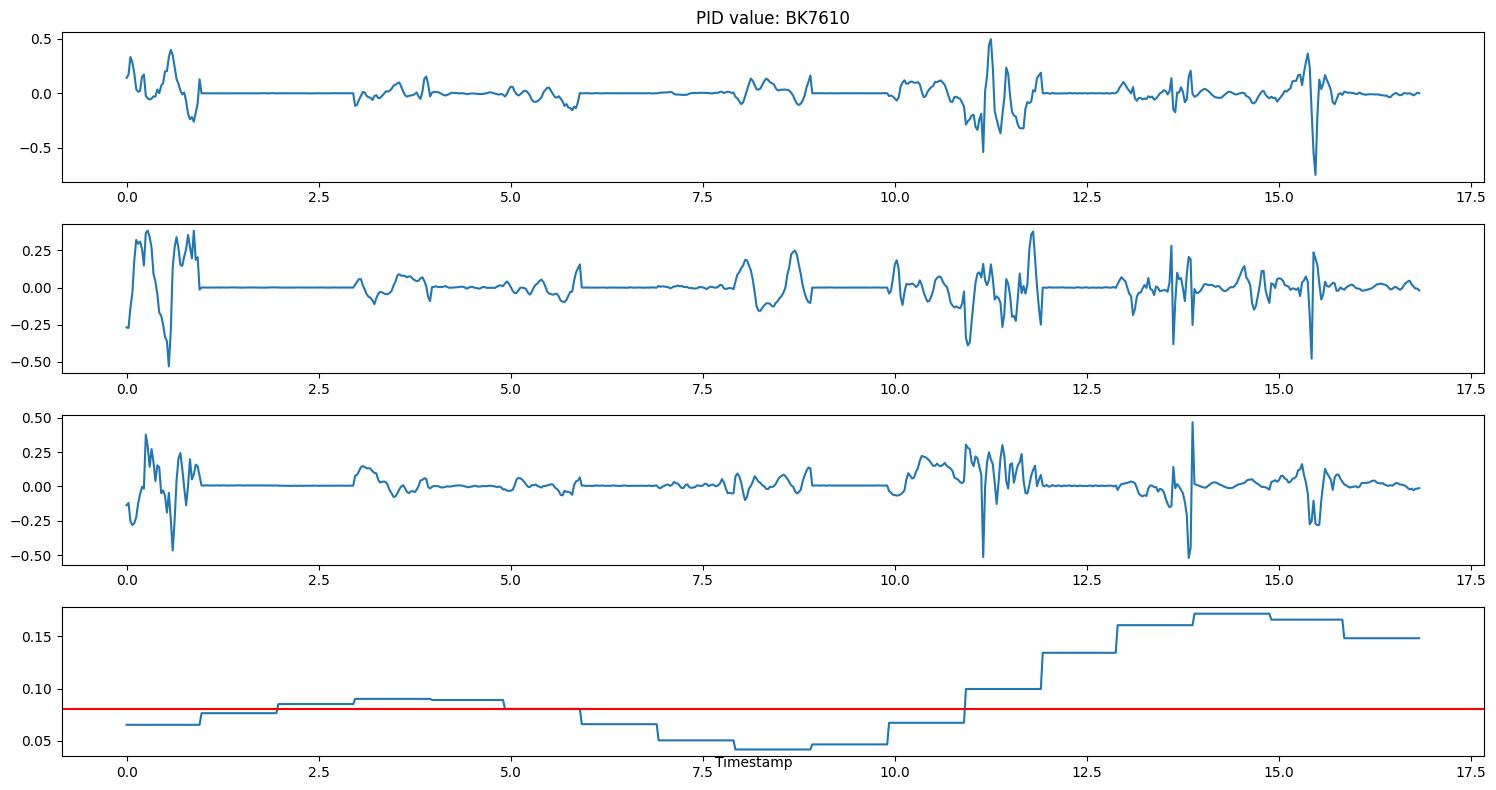

In [205]:
plot_x_y_z(df_bk, "PID value: BK7610")

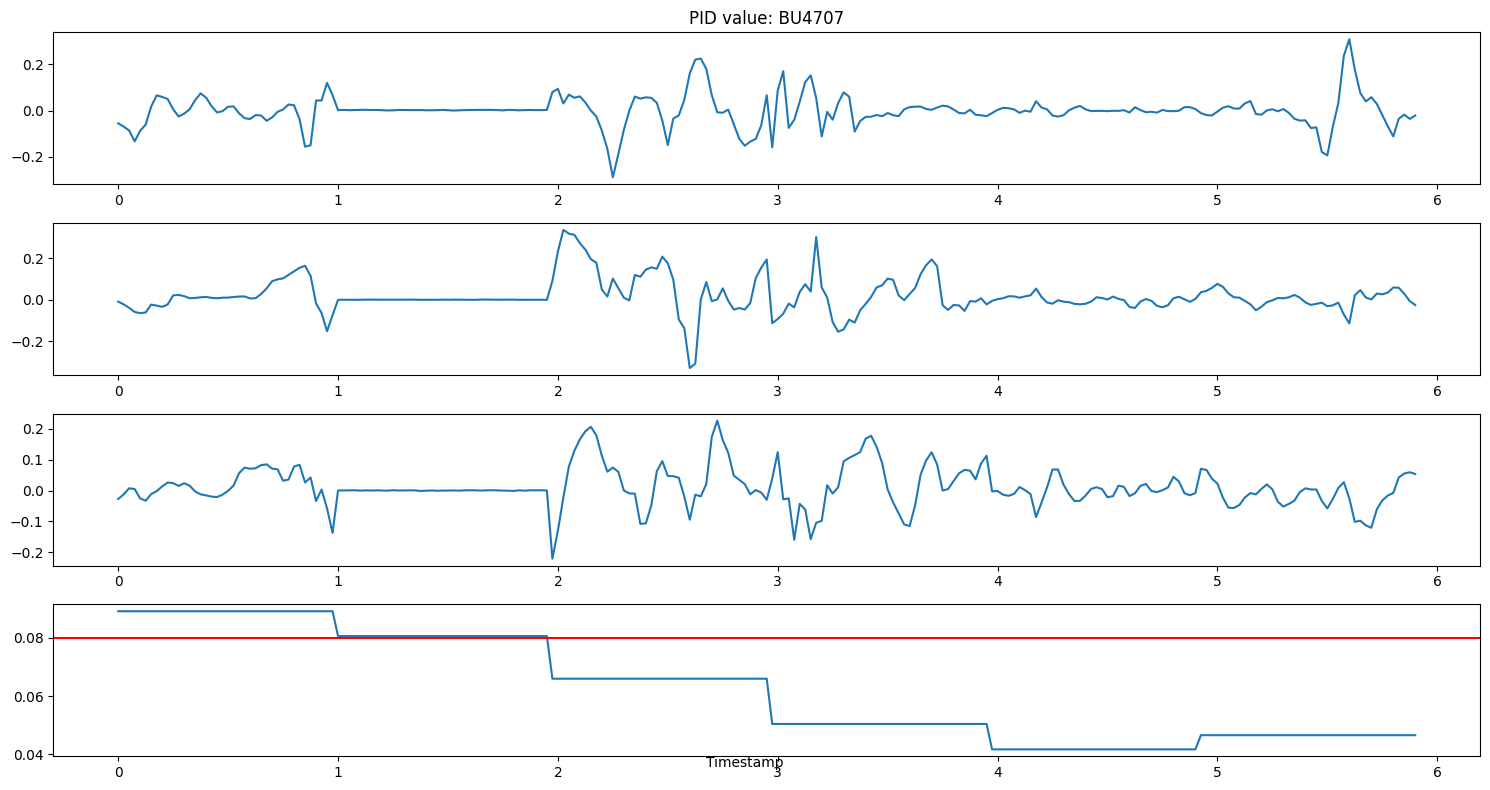

In [99]:
plot_x_y_z(df_bu, "PID value: BU4707")

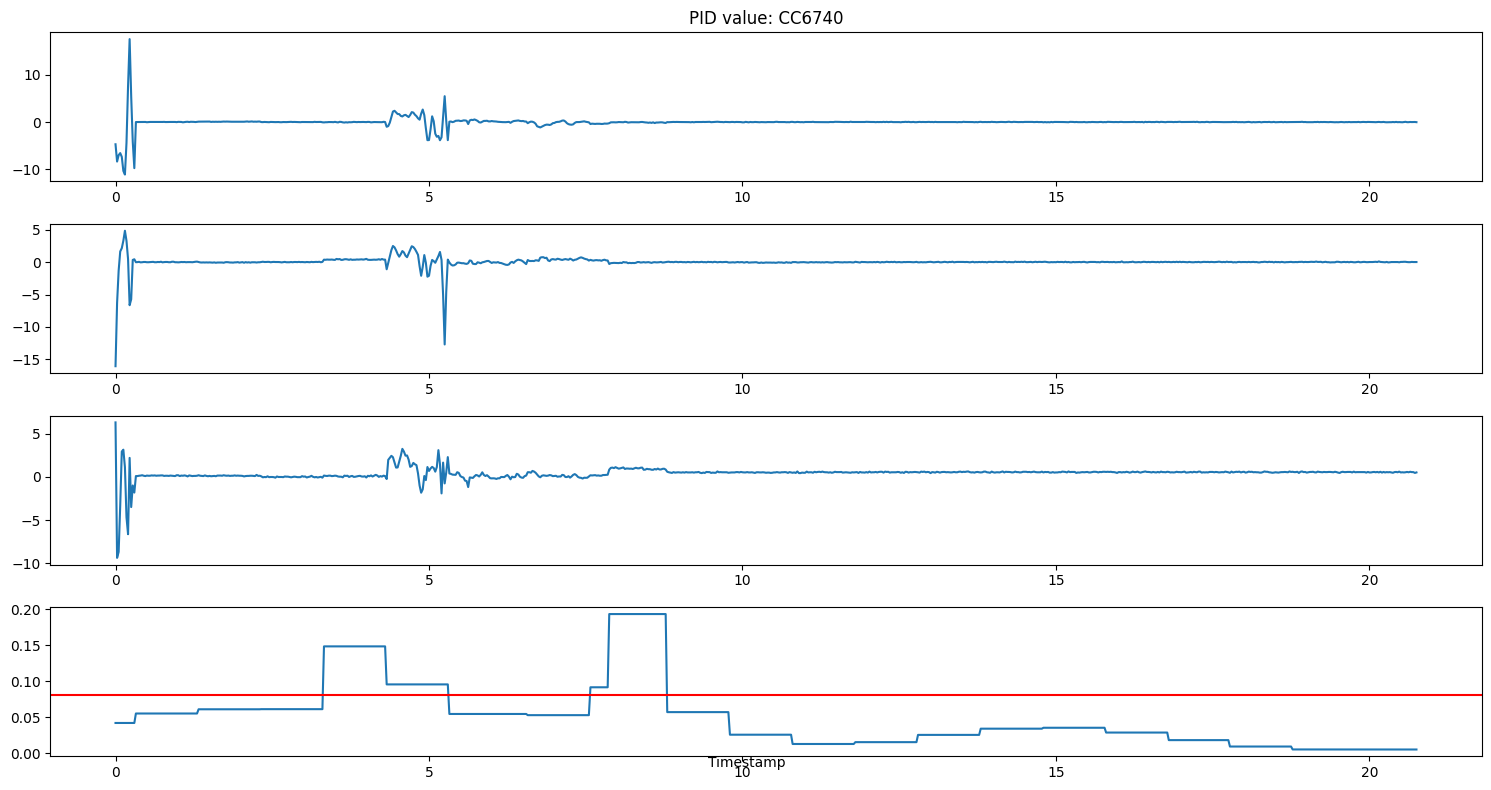

In [100]:
plot_x_y_z(df_cc, "PID value: CC6740")

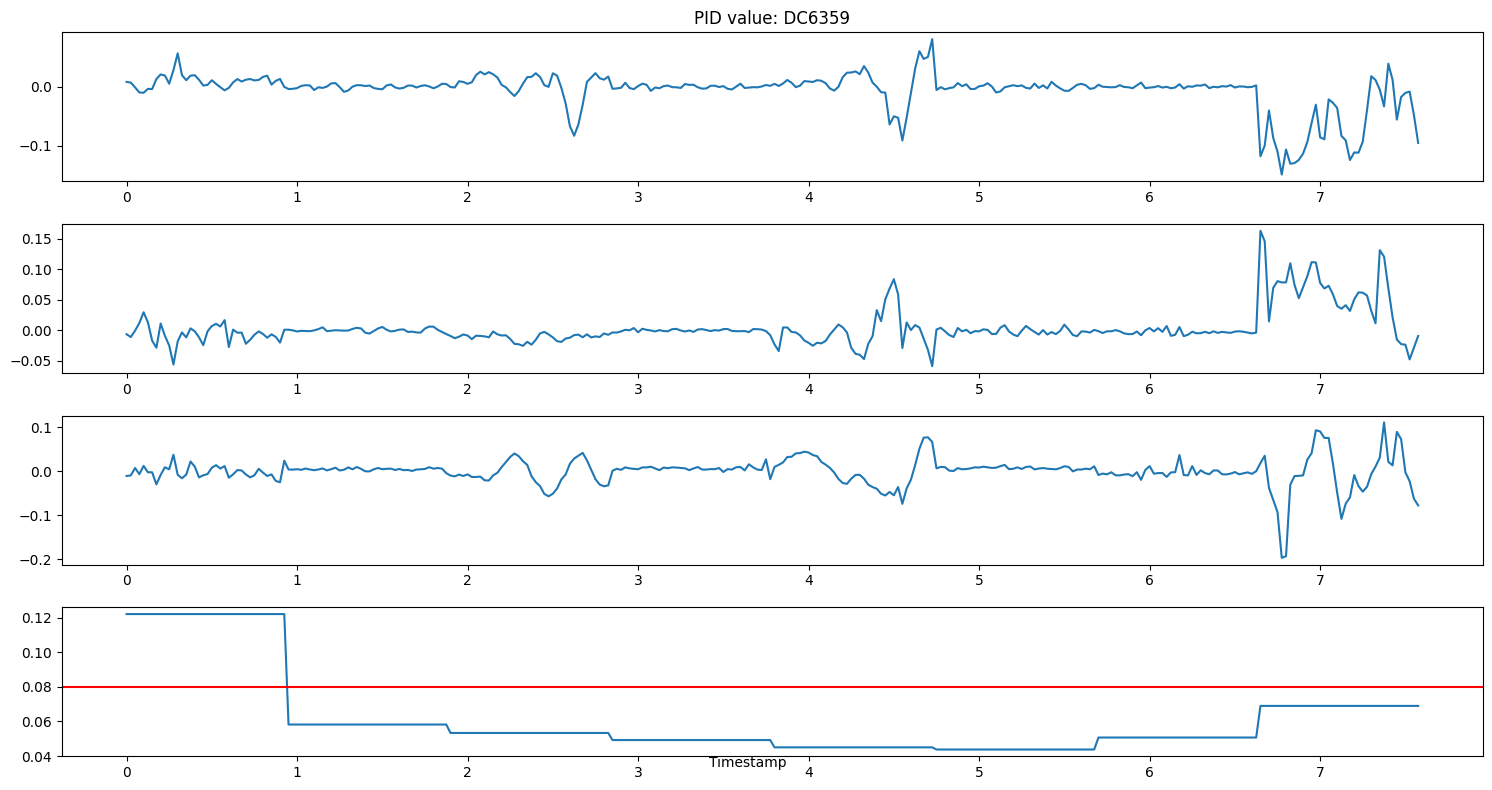

In [101]:
plot_x_y_z(df_dc, "PID value: DC6359")

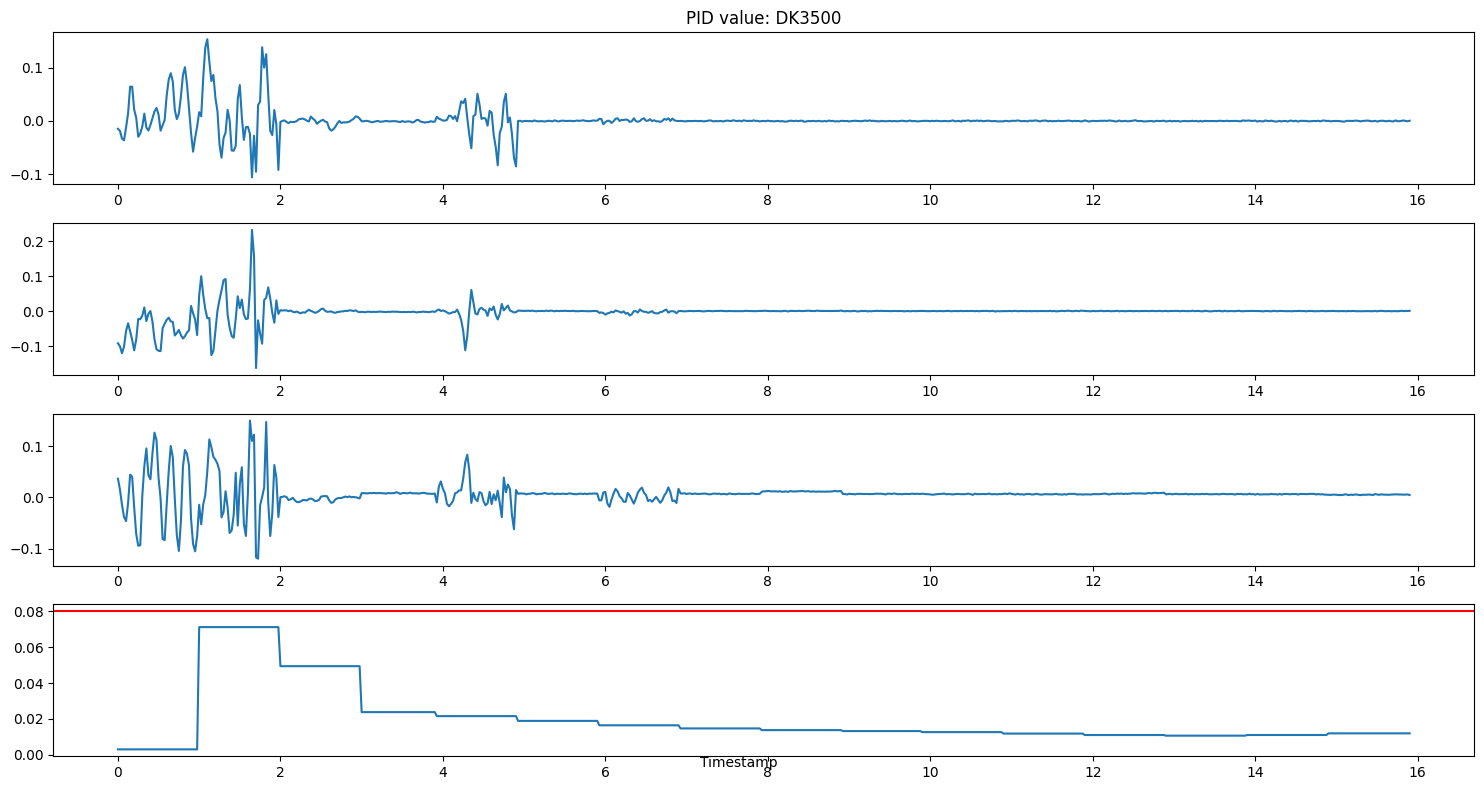

In [102]:
plot_x_y_z(df_dk, "PID value: DK3500")

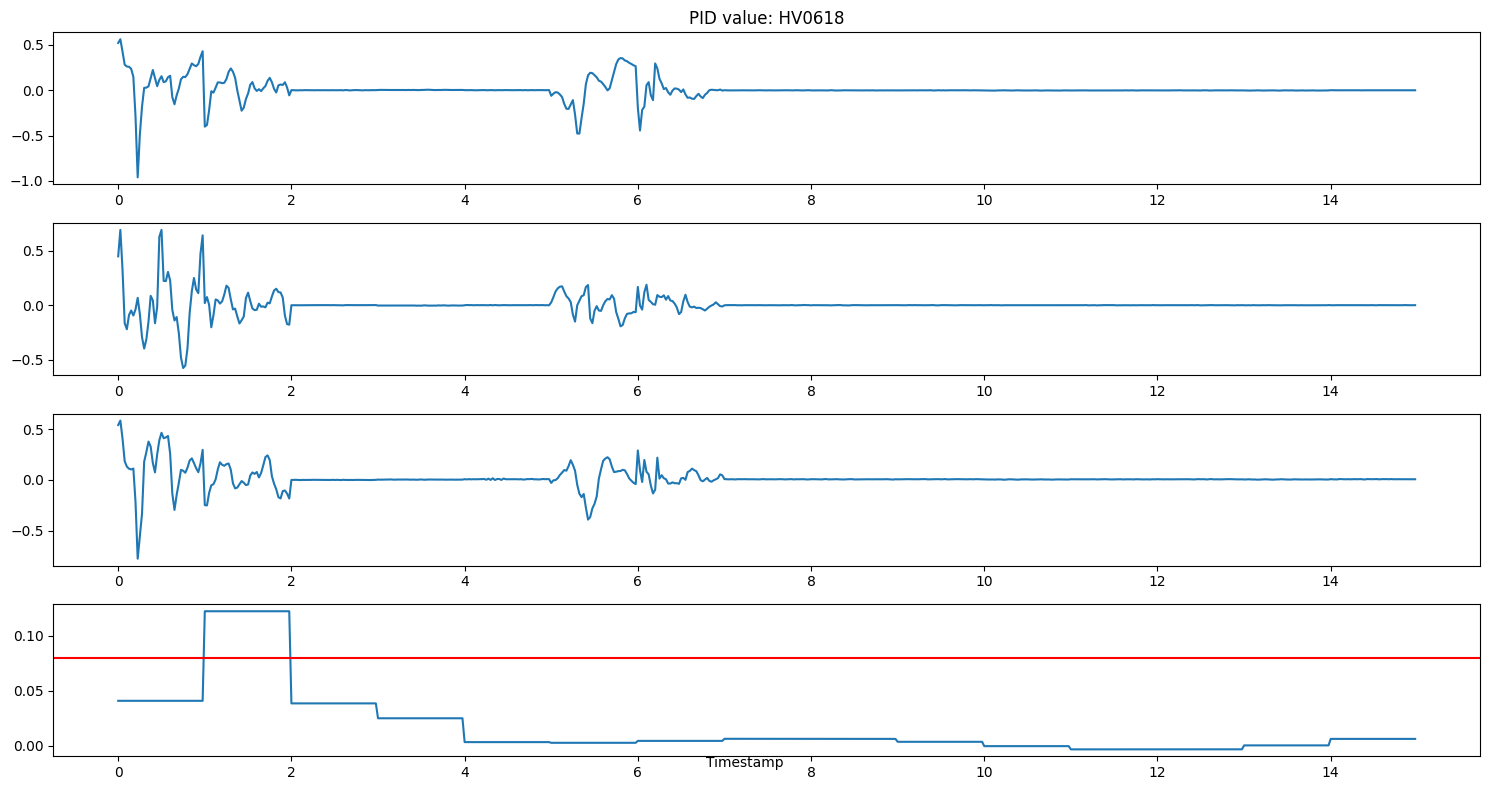

In [103]:
plot_x_y_z(df_hv, "PID value: HV0618")

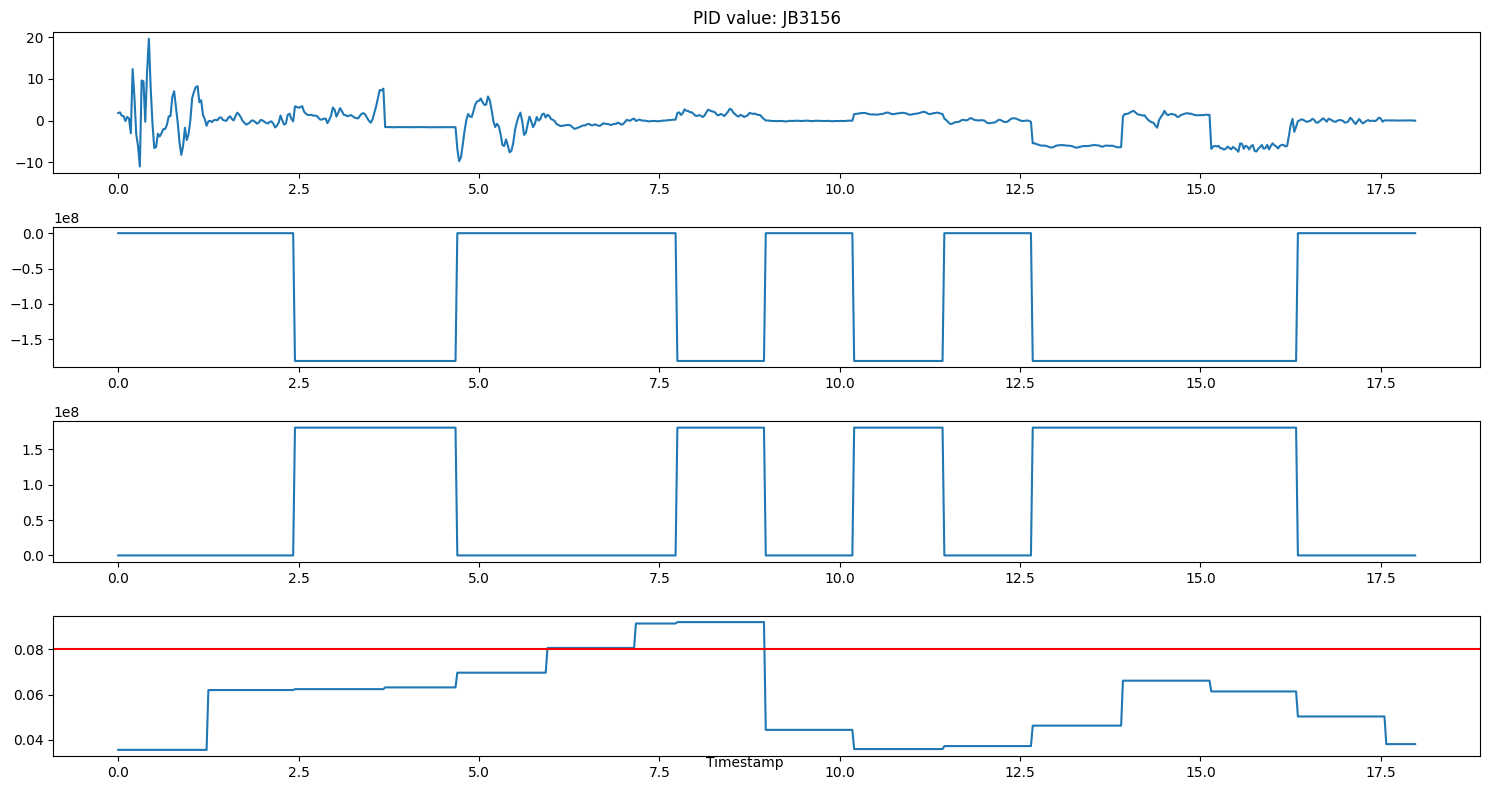

In [105]:
plot_x_y_z(df_jb, "PID value: JB3156")

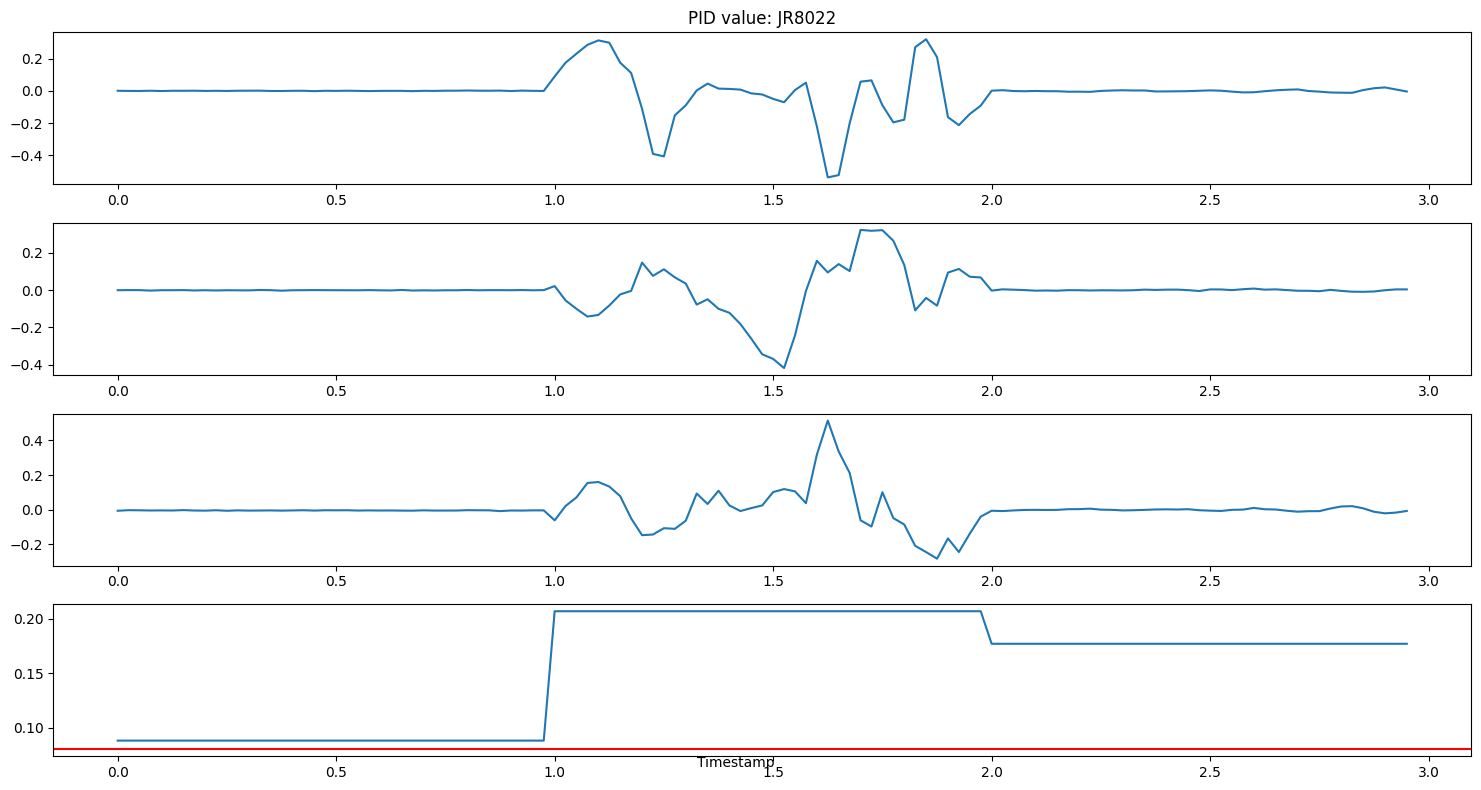

In [109]:
plot_x_y_z(df_jr, "PID value: JR8022")

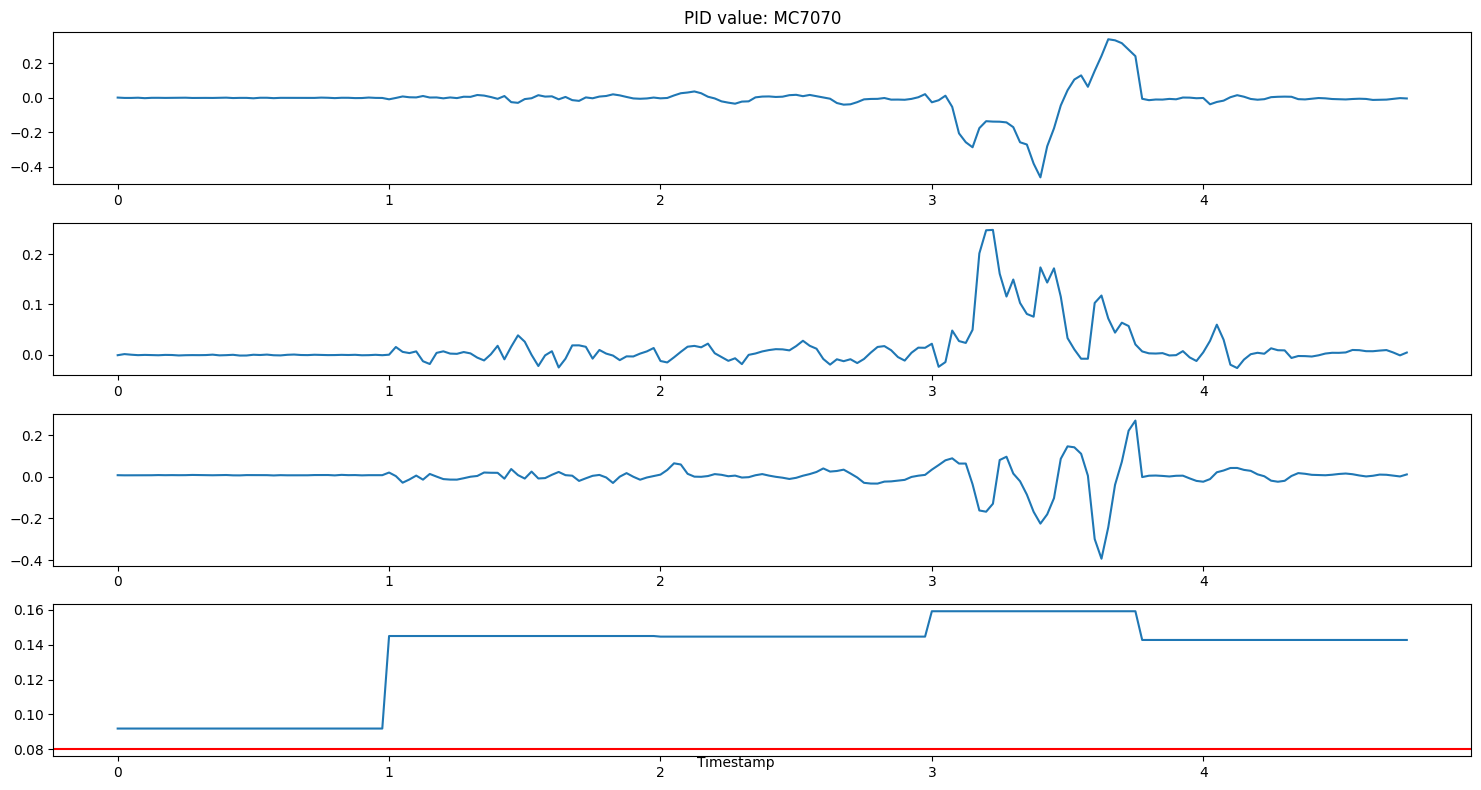

In [110]:
plot_x_y_z(df_mc, "PID value: MC7070")

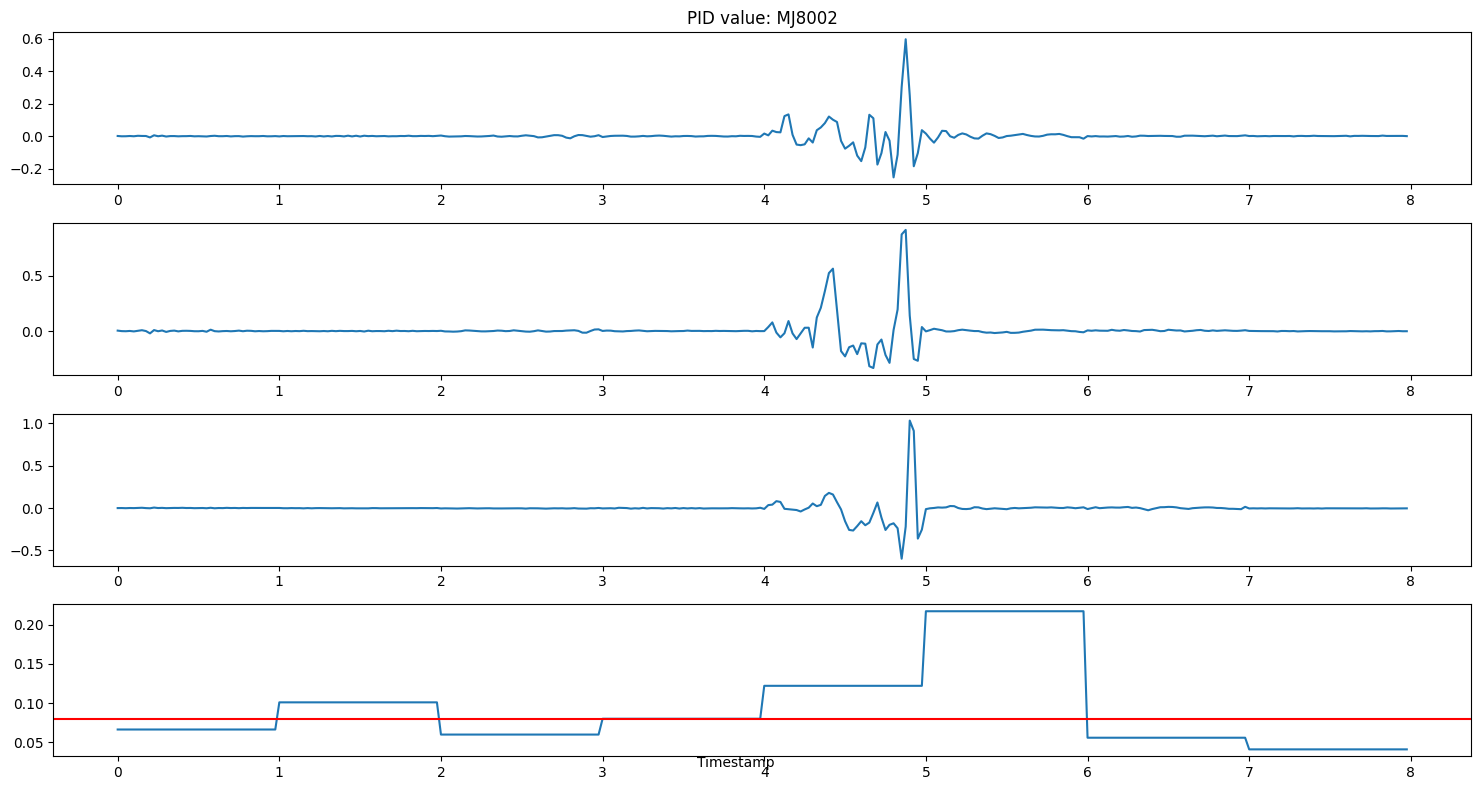

In [111]:
plot_x_y_z(df_mj, "PID value: MJ8002")

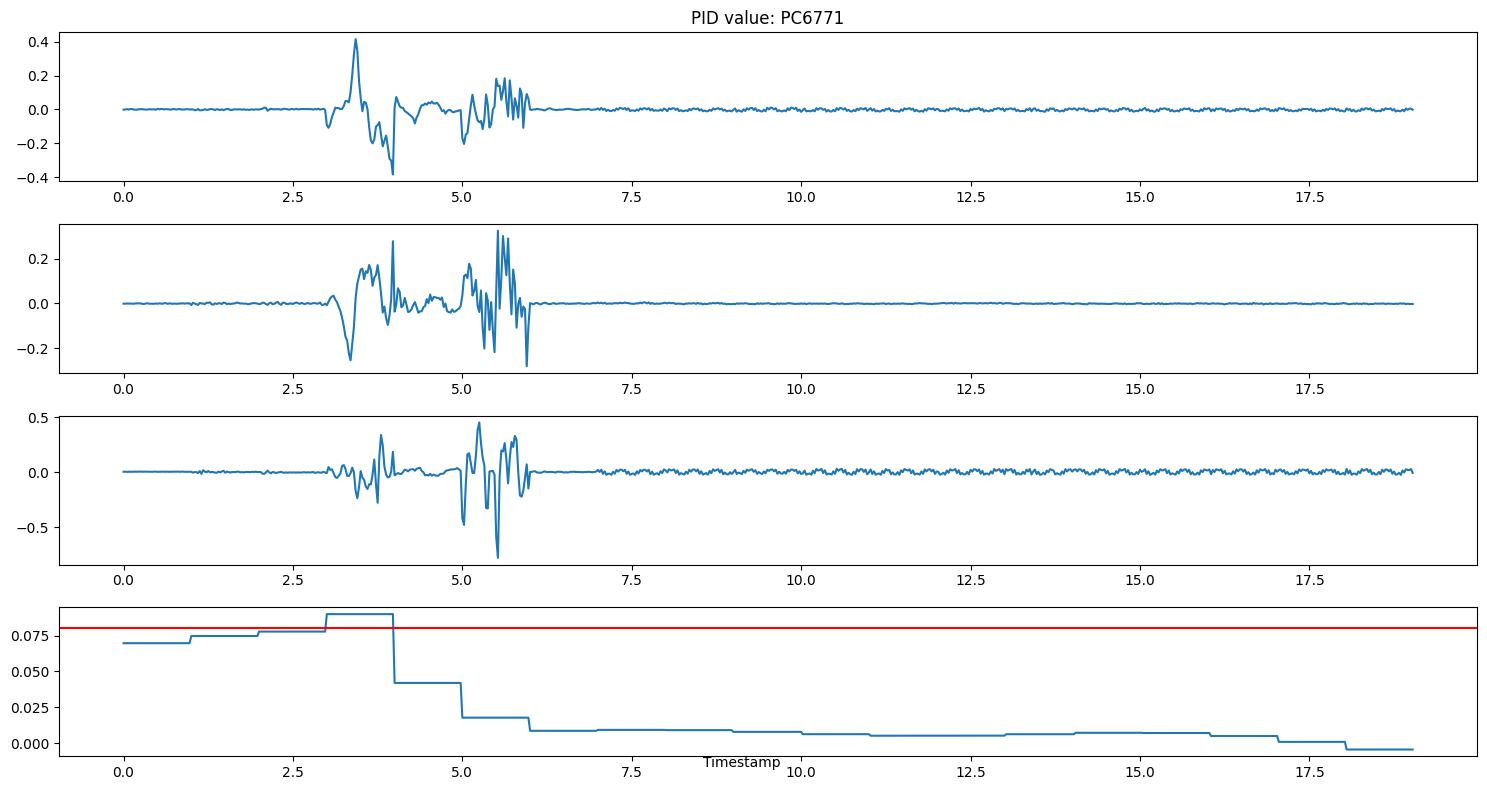

In [112]:
plot_x_y_z(df_pc, "PID value: PC6771")

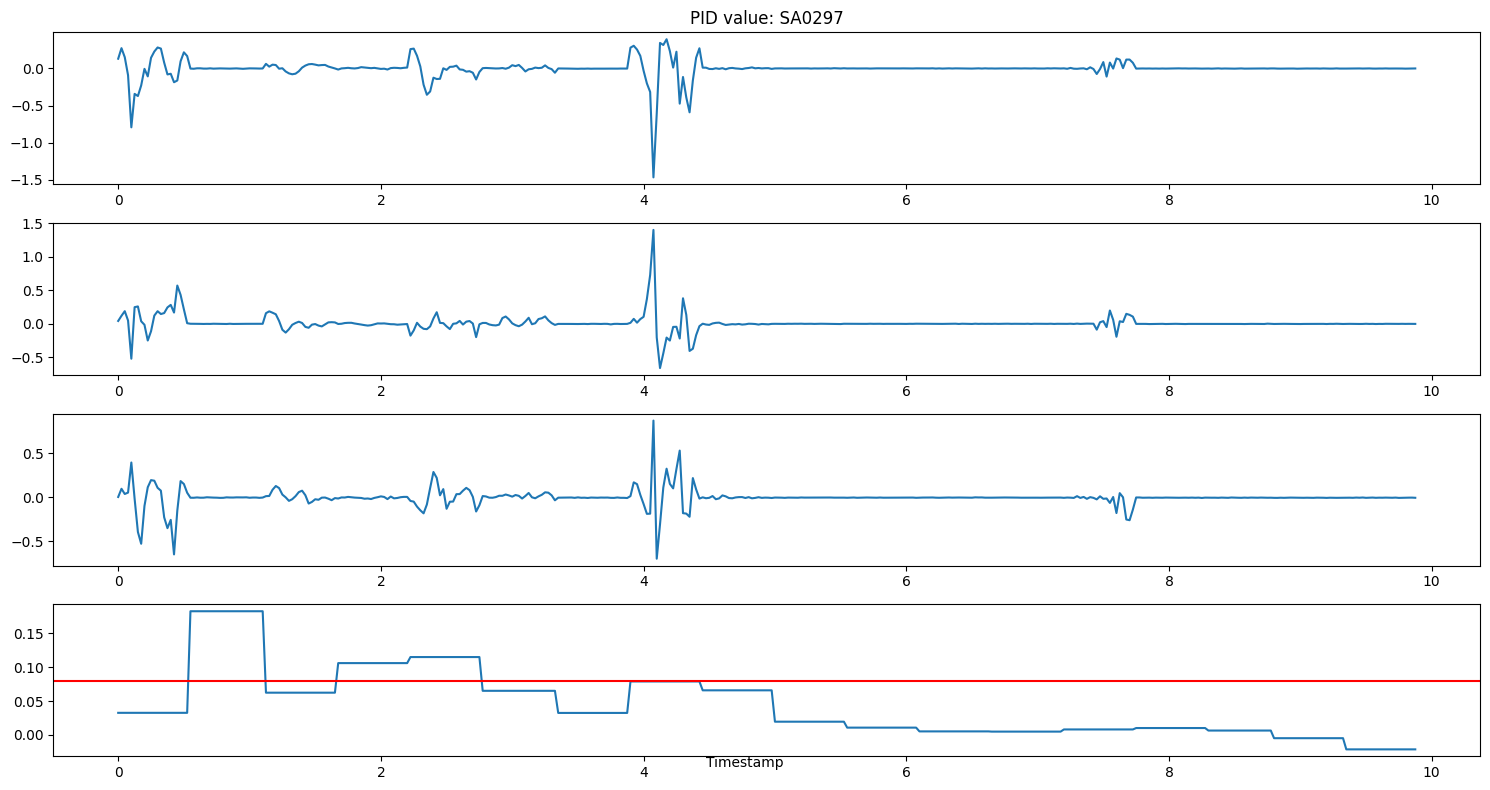

In [113]:
plot_x_y_z(df_sa, "PID value: SA0297")

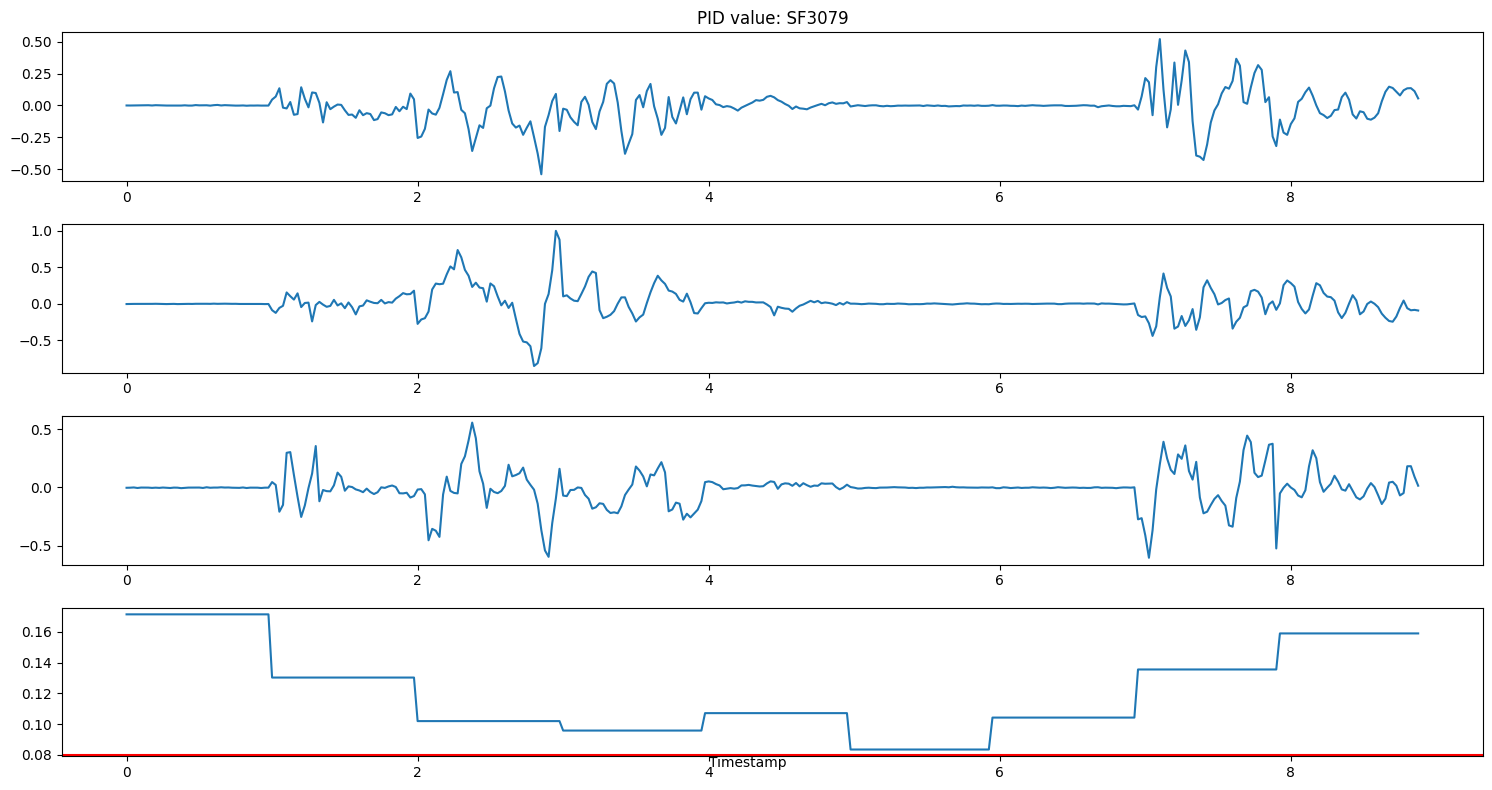

In [114]:
plot_x_y_z(df_sf, "PID value: SF3079")

In [206]:
df_bk

timestamp     pid       x       y       z  TAC_Reading
25    1493737046  BK7610  0.1410 -0.2686 -0.1372     0.065357
32    1493737046  BK7610  0.1714 -0.2722 -0.1208     0.065357
33    1493737046  BK7610  0.3328 -0.1353 -0.2548     0.065357
38    1493737046  BK7610  0.2822 -0.0375 -0.2816     0.065357
44    1493737046  BK7610  0.1847  0.1813 -0.2680     0.065357
...          ...     ...     ...     ...     ...          ...
3058  1493767186  BK7610 -0.0073  0.0220 -0.0166     0.148265
3063  1493767186  BK7610 -0.0191  0.0071 -0.0289     0.148265
3067  1493767186  BK7610 -0.0090 -0.0069 -0.0188     0.148265
3073  1493767186  BK7610  0.0048 -0.0064 -0.0164     0.148265
3077  1493767186  BK7610  0.0012 -0.0193 -0.0132     0.148265

[674 rows x 6 columns]

In [233]:
# Group the DataFrame by 'TAC_Reading' and apply functions to calculate permutation entropy and complexity for each 'x', 'y', 'z'
results = df_bk.groupby('TAC_Reading').apply(lambda x: pd.Series({
    'timestamp': x['timestamp'].iloc[0],  # Take the first timestamp value in the group
    'pid': x['pid'].iloc[0],  # Take the first pid value in the group
    'x': x['x'].iloc[0],  # Take the first x value in the group
    'y': x['y'].iloc[0],  # Take the first y value in the group
    'z': x['z'].iloc[0],  # Take the first z value in the group
    'p_entropy_x': p_entropy(ordinal_patterns(x['x'], 3, 1)),
    'p_entropy_y': p_entropy(ordinal_patterns(x['y'], 3, 1)),
    'p_entropy_z': p_entropy(ordinal_patterns(x['z'], 3, 1)),
    'complexity_x': complexity(ordinal_patterns(x['x'], 3, 1)),
    'complexity_y': complexity(ordinal_patterns(x['y'], 3, 1)),
    'complexity_z': complexity(ordinal_patterns(x['z'], 3, 1))
})).reset_index()

# Print the resulting DataFrame
results


TAC_Reading   timestamp     pid       x       y       z  p_entropy_x  \
0      0.041689  1493752430  BK7610 -0.0333  0.0401  0.0715     0.771728   
1      0.046559  1493754265  BK7610  0.0001  0.0004  0.0056     0.967383   
2      0.050424  1493750580  BK7610  0.0019  0.0109 -0.0100     0.912898   
3      0.065357  1493737046  BK7610  0.1410 -0.2686 -0.1372     0.900914   
4      0.065953  1493748731  BK7610 -0.0011  0.0006  0.0051     0.892937   
5      0.067269  1493756113  BK7610 -0.0248 -0.0402 -0.0338     0.842791   
6      0.076462  1493738847  BK7610  0.0001  0.0003  0.0069     0.989350   
7      0.080588  1493746883  BK7610 -0.0295  0.0271 -0.0210     0.847557   
8      0.085197  1493740845  BK7610  0.0004 -0.0001  0.0045     0.991455   
9      0.089122  1493744843  BK7610  0.0058  0.0026 -0.0039     0.838503   
10     0.090165  1493742871  BK7610 -0.1156  0.0179  0.0778     0.805045   
11     0.099630  1493757960  BK7610 -0.2864 -0.3358  0.3045     0.886177   
12     0.134315  1493759807  BK7610  0.0011 -0.0011  0.0063     0.887487   
13     0.148265  1493767186  BK7610  0.0159 -0.0149  0.0146     0.899546   
14     0.160774  1493761652  BK7610  0.0168  0.0235 -0.0260     0.977528   
15     0.166076  1493765341  BK7610 -0.0318  0.0287  0.0314     0.924101   
16     0.171758  1493763497  BK7610 -0.0313 -0.0096  0.0171     0.769285   

    p_entropy_y  p_entropy_z  complexity_x  complexity_y  complexity_z  
0      0.701939     0.768767      0.176715      0.212403      0.180278  
1      0.977528     0.960643      0.031972      0.021814      0.037884  
2      0.910012     0.932597      0.080056      0.077904      0.061309  
3      0.875105     0.961033      0.086503      0.108894      0.037932  
4      0.950350     0.986392      0.094573      0.046908      0.013538  
5      0.852548     0.761480      0.138764      0.120669      0.179115  
6      0.986392     0.983933      0.010338      0.013538      0.015965  
7      0.739179     0.880289      0.125673      0.196830      0.106298  
8      0.991455     0.991455      0.008398      0.008398      0.008398  
9      0.851780     0.908885      0.130165      0.128967      0.083686  
10     0.761480     0.827230      0.149129      0.179115      0.141411  
11     0.953072     0.875828      0.099024      0.043037      0.105491  
12     0.999015     0.993964      0.107921      0.000955      0.005990  
13     0.808144     0.935406      0.093643      0.153254      0.059536  
14     0.935406     0.846690      0.021814      0.059536      0.134366  
15     0.896534     0.838242      0.065509      0.089083      0.133270  
16     0.836844     0.682690      0.175243      0.132866      0.219448

In [234]:
def plot_entropy_and_complexity(df, title_prefix):
    # Define the segment start and end indices based on changes in timestamp
    segment_start_indices = [0]
    for i in range(1, len(df)):
        if df['TAC_Reading'].iloc[i] != df['TAC_Reading'].iloc[i-1]:
            segment_start_indices.append(i)

    # Calculate entropy and complexity for each segment and axis
    pe_results_x, pe_results_y, pe_results_z = [], [], []
    comp_results_x, comp_results_y, comp_results_z = [], [], []

    for i in range(1, len(segment_start_indices)):
        segment_start_index = segment_start_indices[i-1]
        segment_end_index = segment_start_indices[i]
        df_segment = df.iloc[segment_start_index:segment_end_index]

        # Calculate entropy and complexity for each axis
        pe_x, comp_x = calculate_entropy_and_complexity(df_segment, 'x')
        pe_y, comp_y = calculate_entropy_and_complexity(df_segment, 'y')
        pe_z, comp_z = calculate_entropy_and_complexity(df_segment, 'z')

        # Append results to respective lists
        pe_results_x.append(pe_x)
        pe_results_y.append(pe_y)
        pe_results_z.append(pe_z)
        comp_results_x.append(comp_x)
        comp_results_y.append(comp_y)
        comp_results_z.append(comp_z)
        #print(pe_results_x)
    # Create subplots with 1 row and 2 columns
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Plot permutation entropy results for each axis
    sns.lineplot(data=pe_results_x, label='Permutation Entropy (X)', color='purple', ax=axs[0])
    sns.lineplot(data=pe_results_y, label='Permutation Entropy (Y)', color='red', ax=axs[0])
    sns.lineplot(data=pe_results_z, label='Permutation Entropy (Z)', color='green', ax=axs[0])
    axs[0].set_xlabel('Segment Index')
    axs[0].set_ylabel('Permutation Entropy')
    axs[0].set_title(f'Permutation Entropy for {title_prefix} based on X, Y, and Z Axes')
    axs[0].legend()

    # Plot complexity results for each axis
    sns.lineplot(data=comp_results_x, label='Complexity (X)', color='purple', ax=axs[1])
    sns.lineplot(data=comp_results_y, label='Complexity (Y)', color='red', ax=axs[1])
    sns.lineplot(data=comp_results_z, label='Complexity (Z)', color='green', ax=axs[1])
    axs[1].set_xlabel('Segment Index')
    axs[1].set_ylabel('Complexity')
    axs[1].set_title(f'Complexity for {title_prefix} based on X, Y, and Z Axes')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

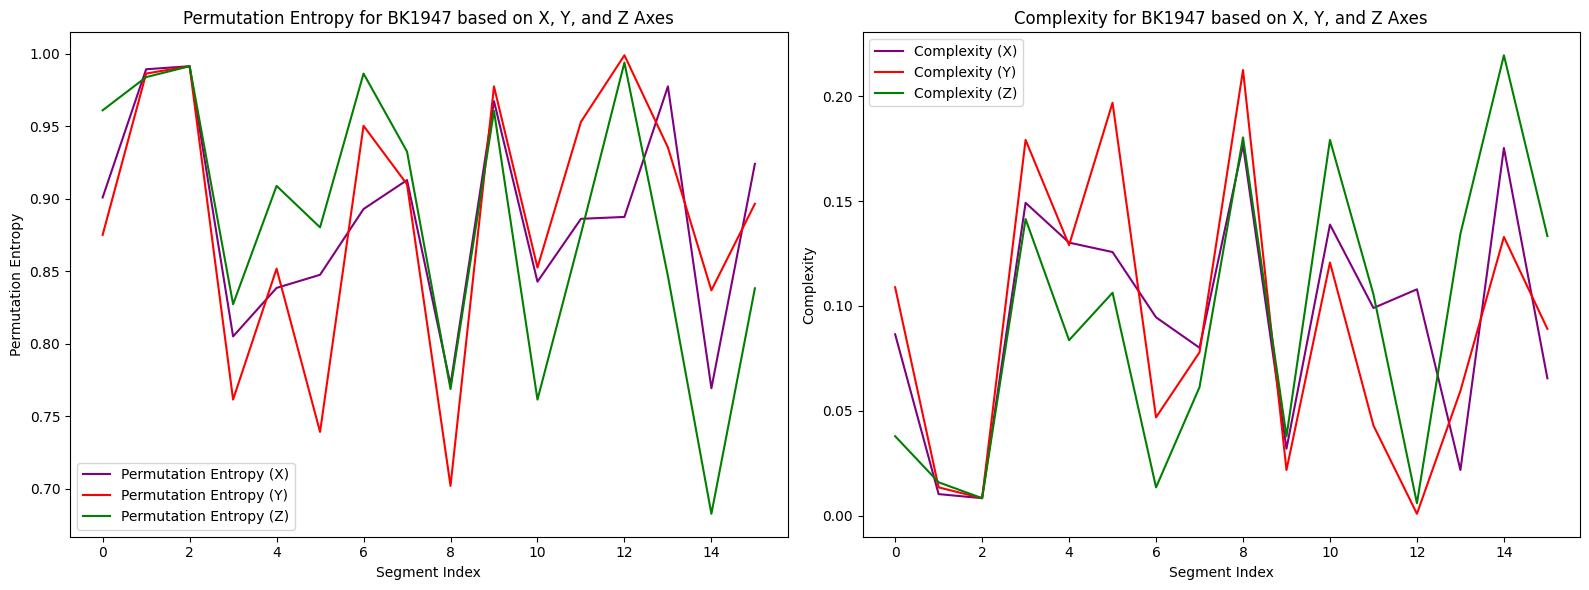

In [235]:
# Call the function for each DataFrame with unique title prefixes
plot_entropy_and_complexity(df_bk, 'BK1947')

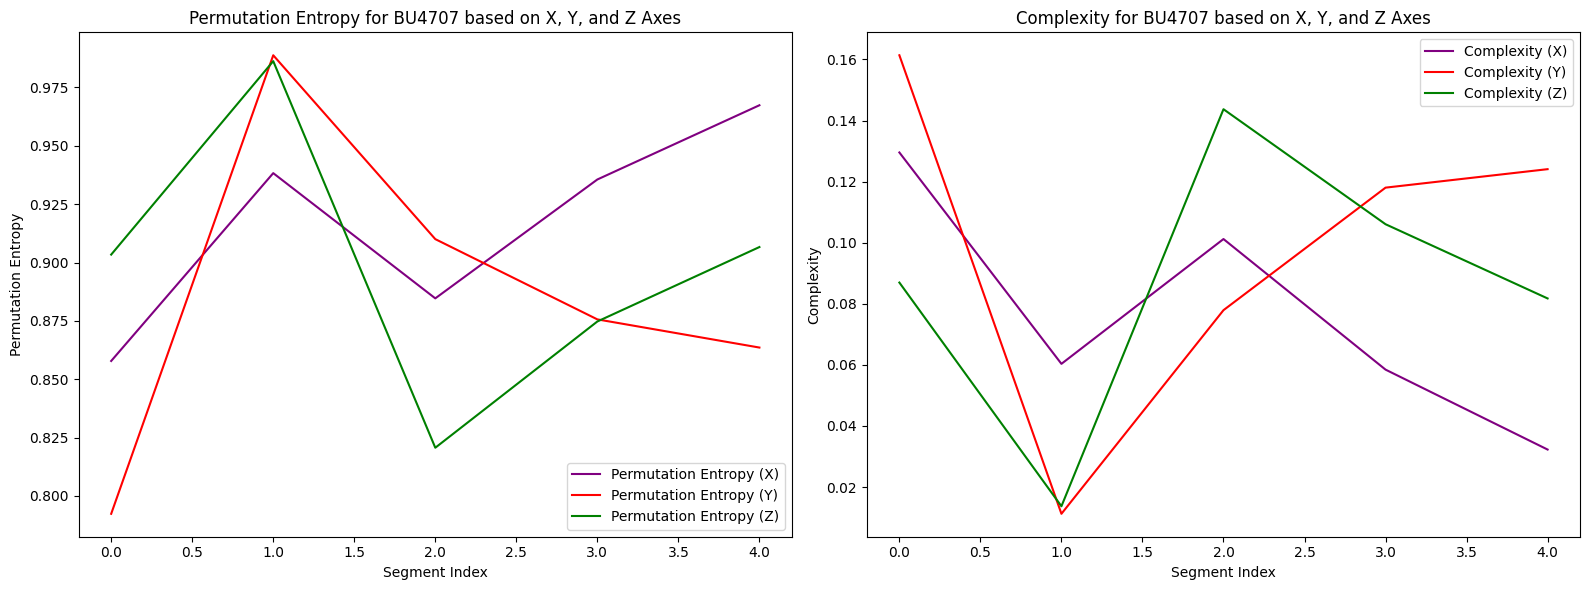

In [224]:
plot_entropy_and_complexity(df_bu, 'BU4707')

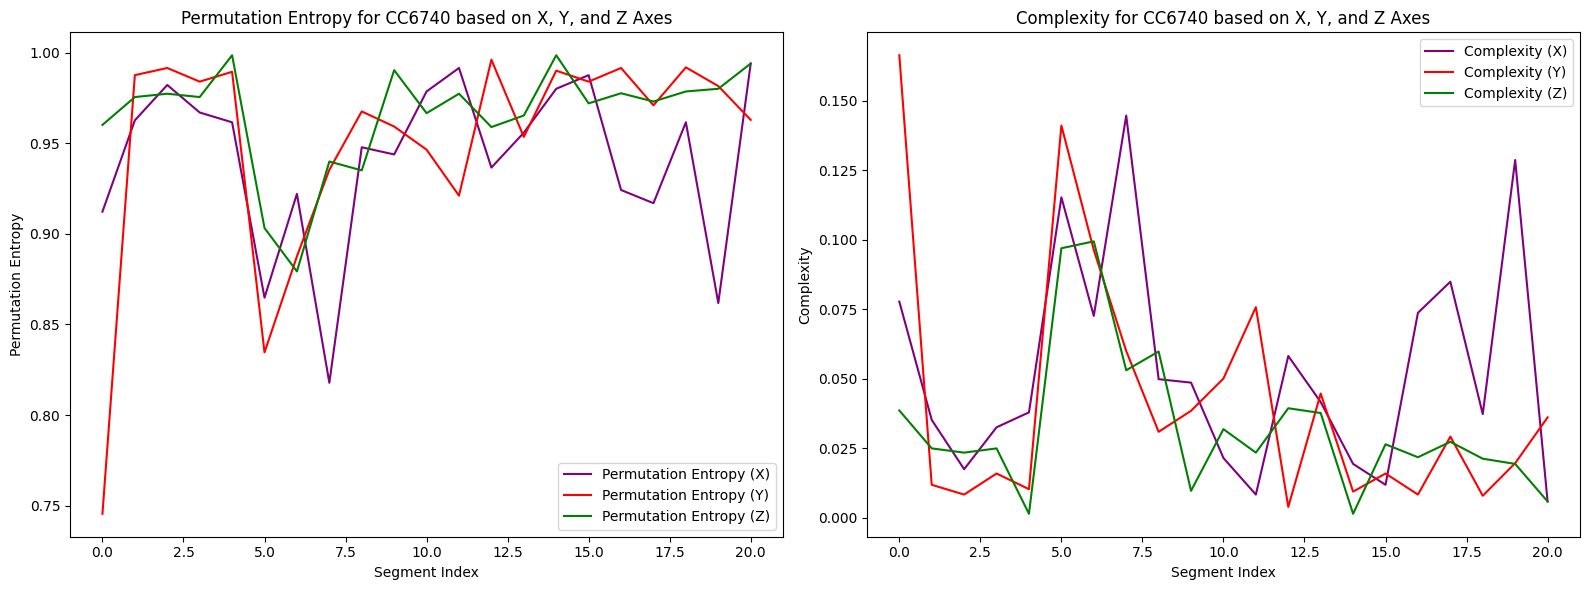

In [225]:
plot_entropy_and_complexity(df_cc, 'CC6740')

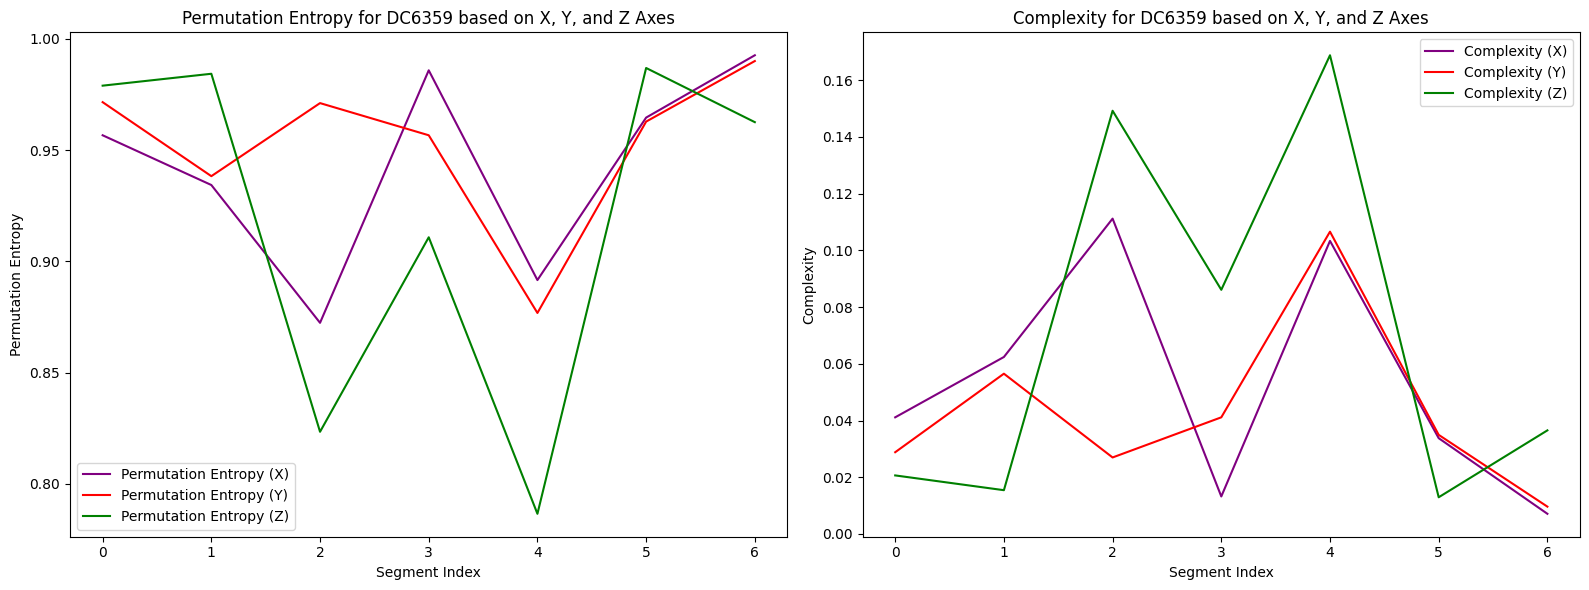

In [226]:
plot_entropy_and_complexity(df_dc, 'DC6359')

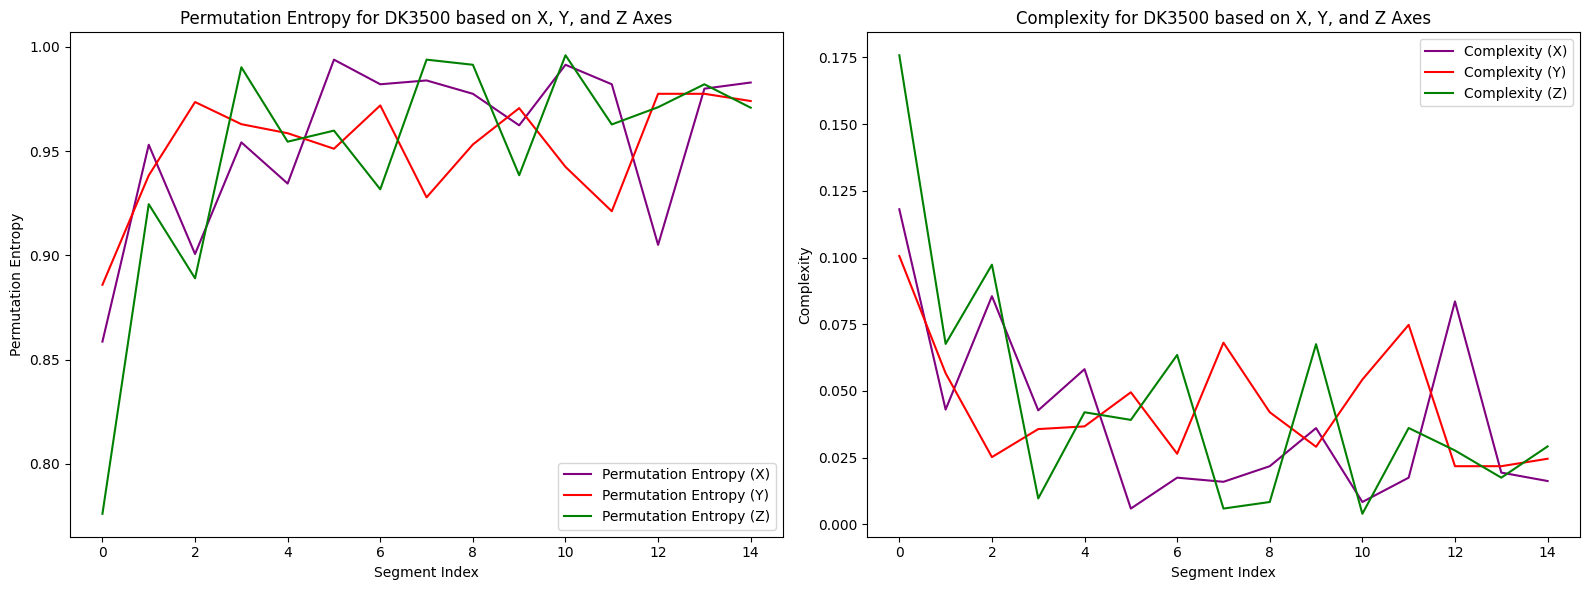

In [227]:
plot_entropy_and_complexity(df_dk, 'DK3500')

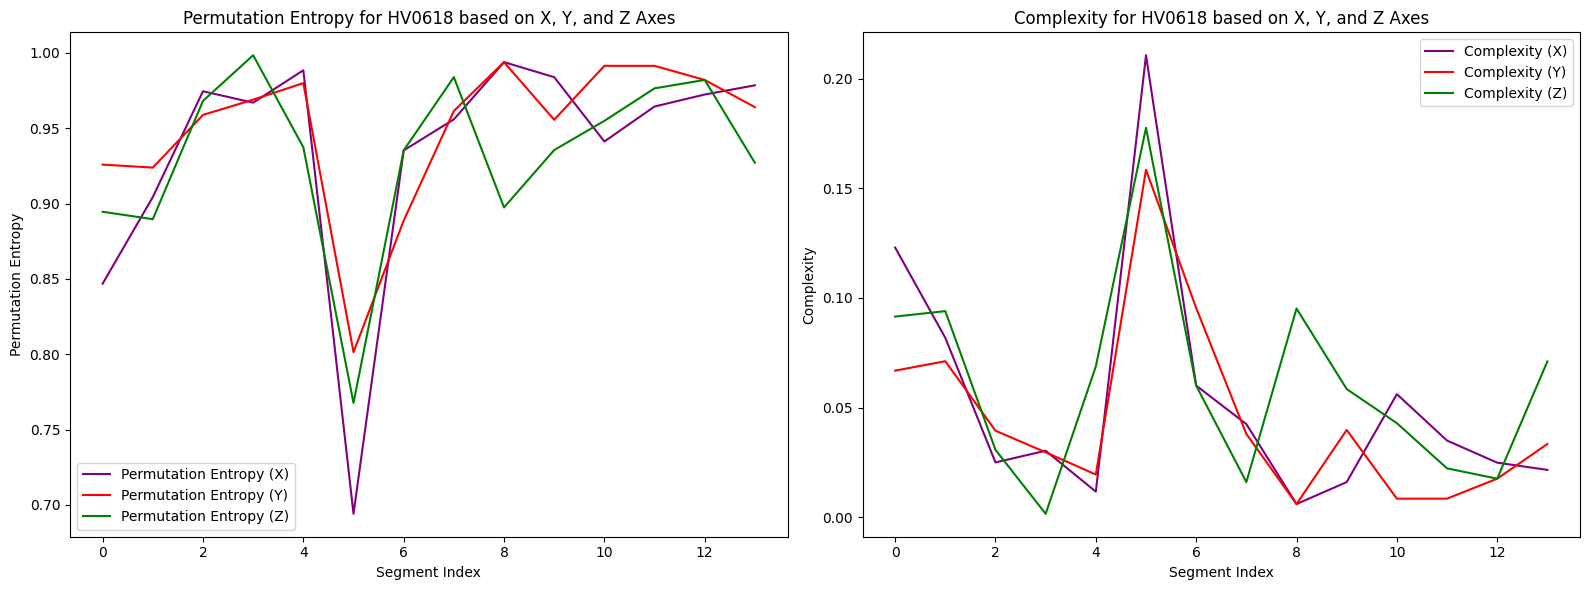

In [228]:
plot_entropy_and_complexity(df_hv, 'HV0618')

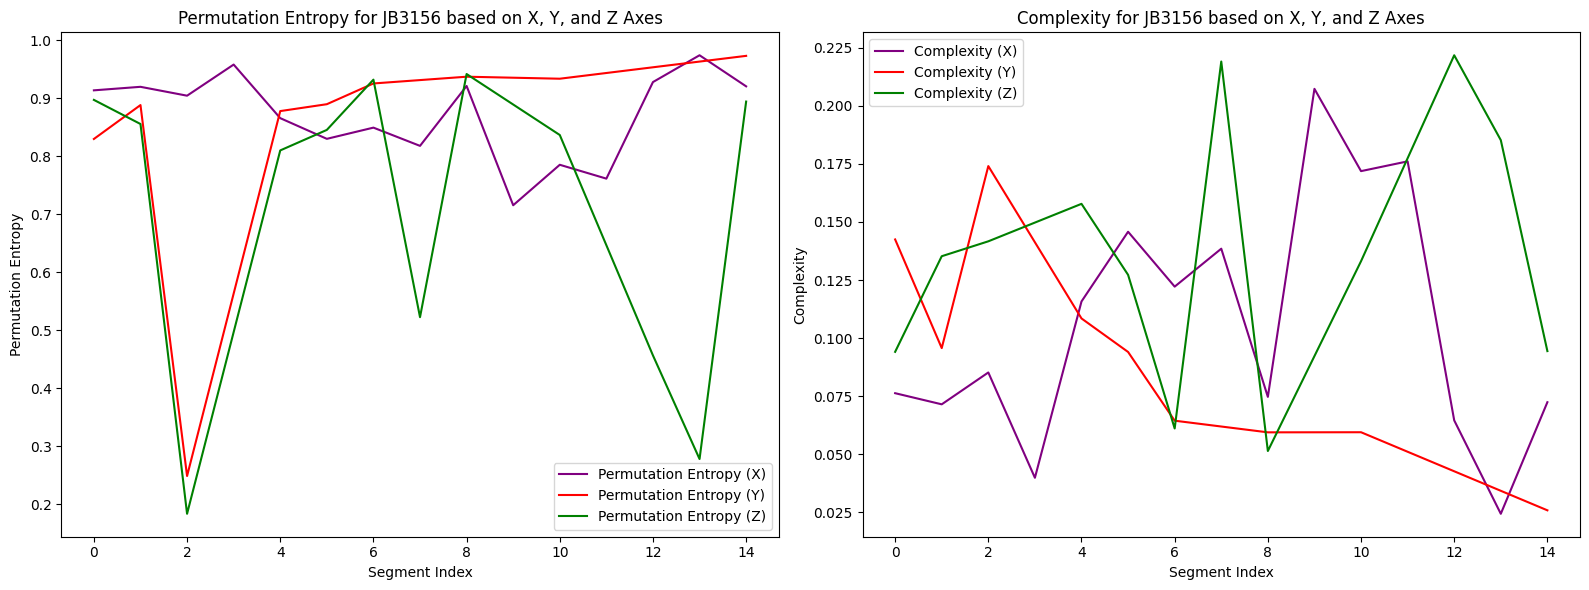

In [229]:
plot_entropy_and_complexity(df_jb, 'JB3156')

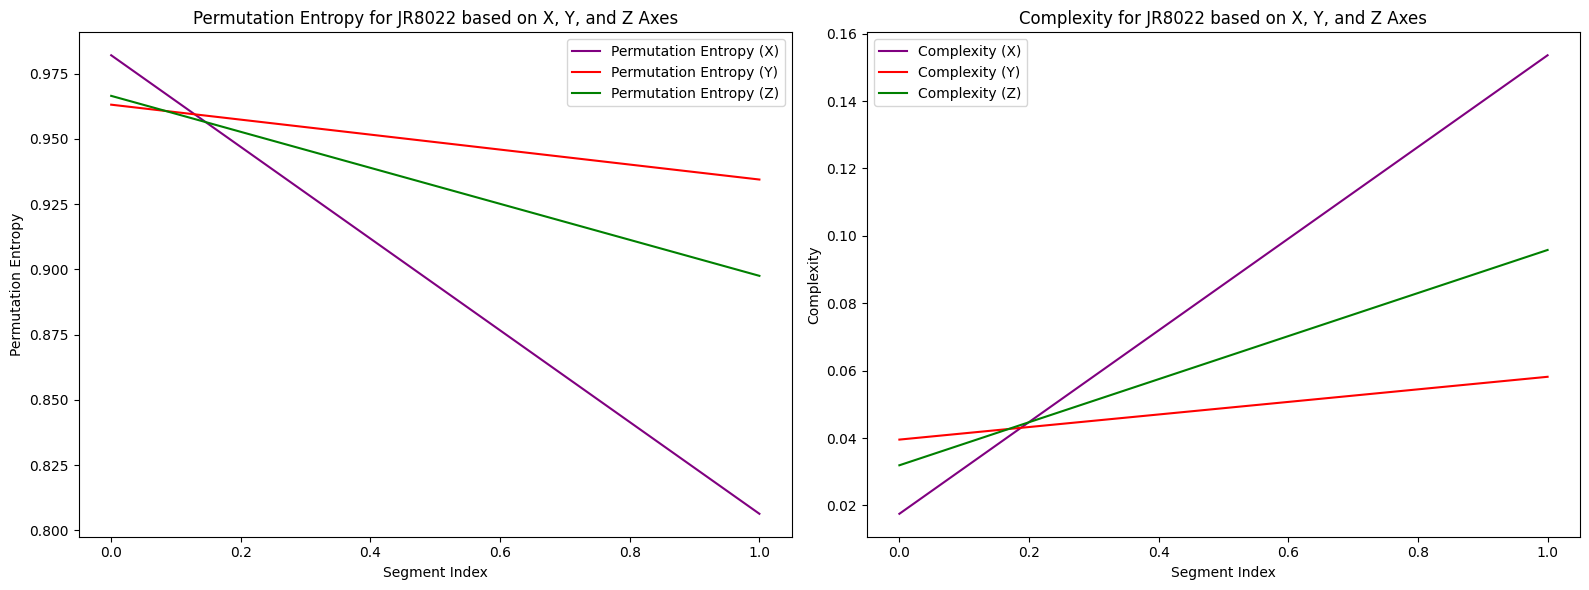

In [231]:
plot_entropy_and_complexity(df_jr, 'JR8022')

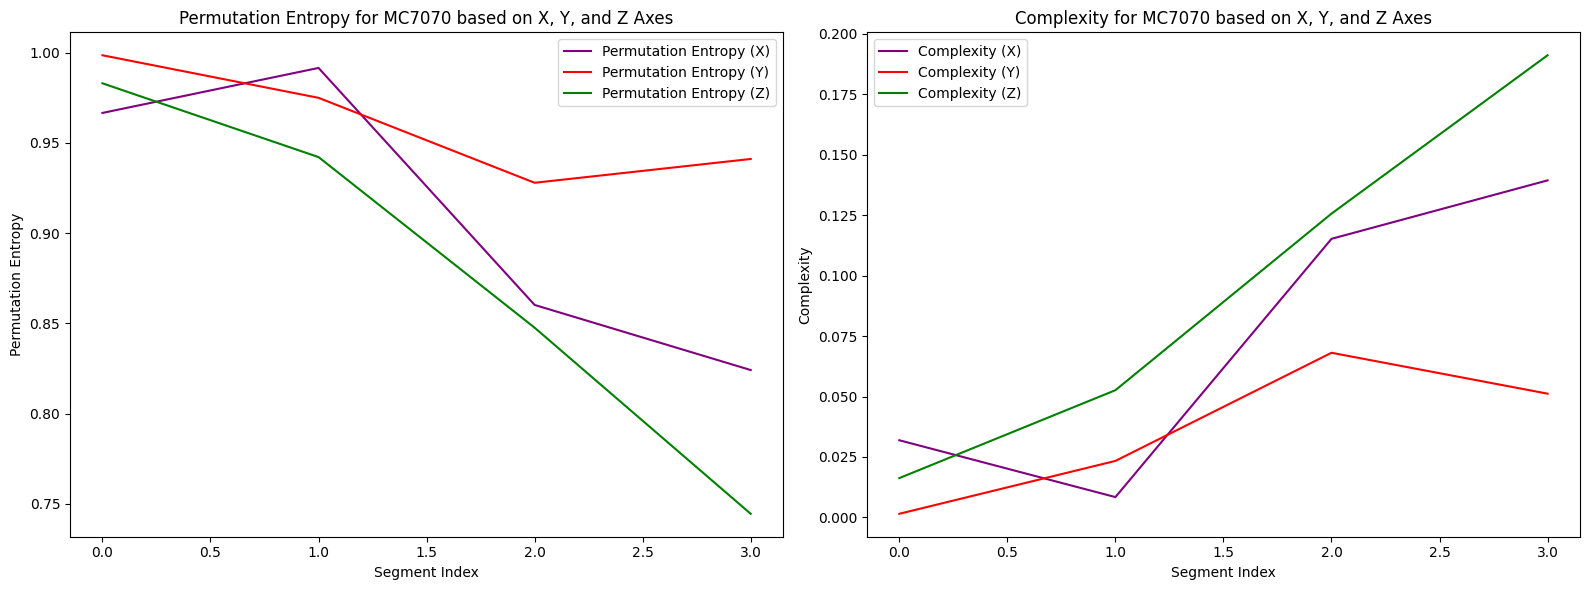

In [236]:
plot_entropy_and_complexity(df_mc, 'MC7070')

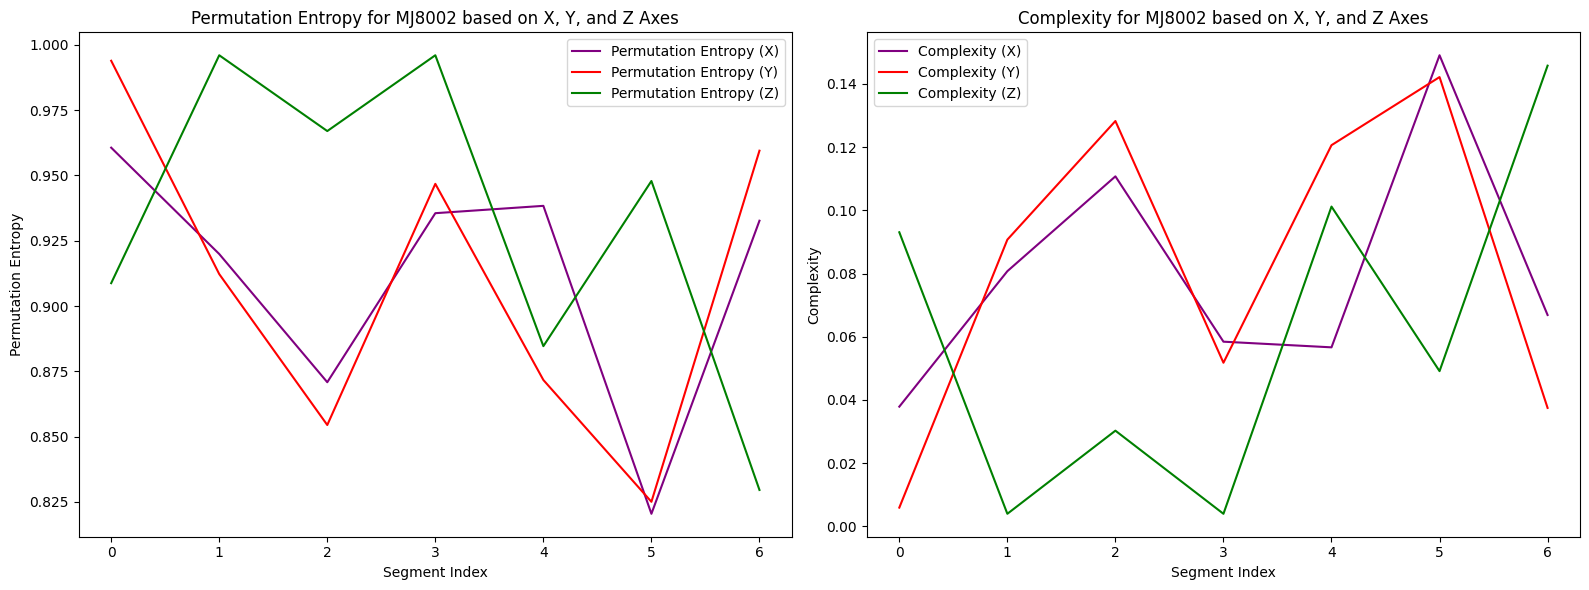

In [237]:
plot_entropy_and_complexity(df_mj, 'MJ8002')

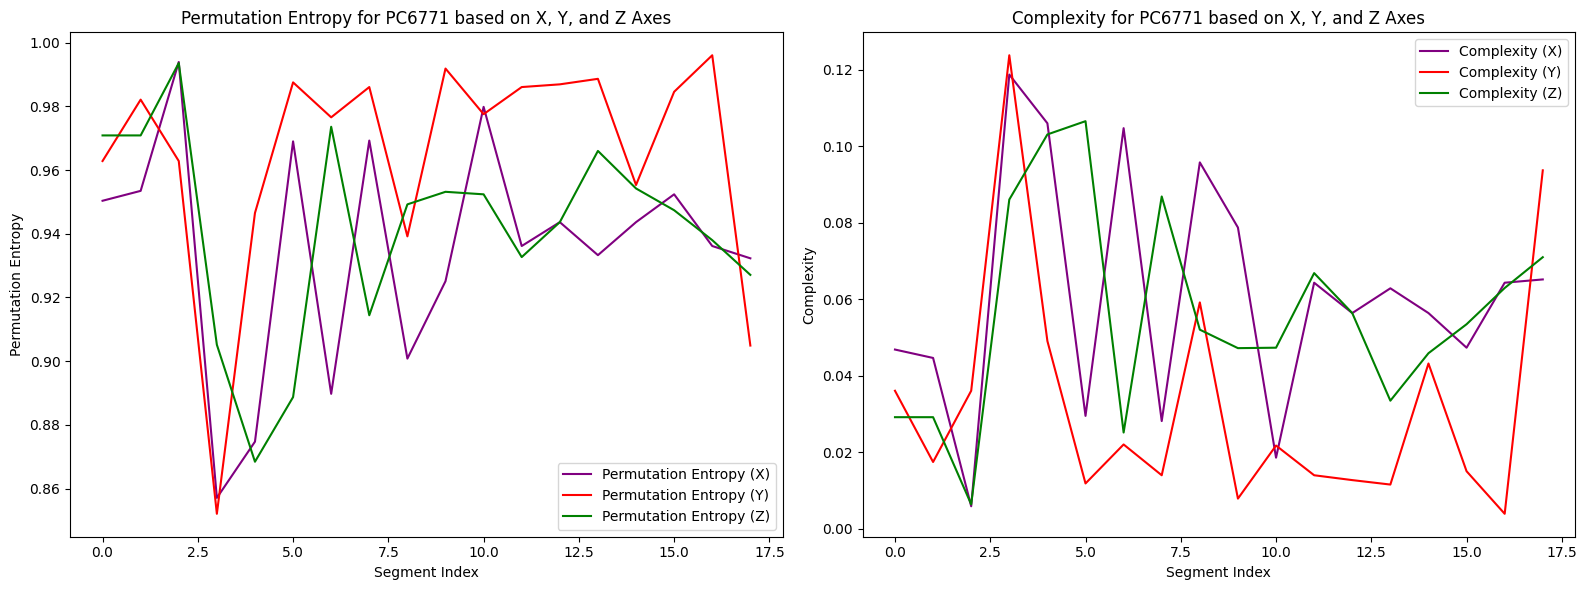

In [238]:
plot_entropy_and_complexity(df_pc, 'PC6771')

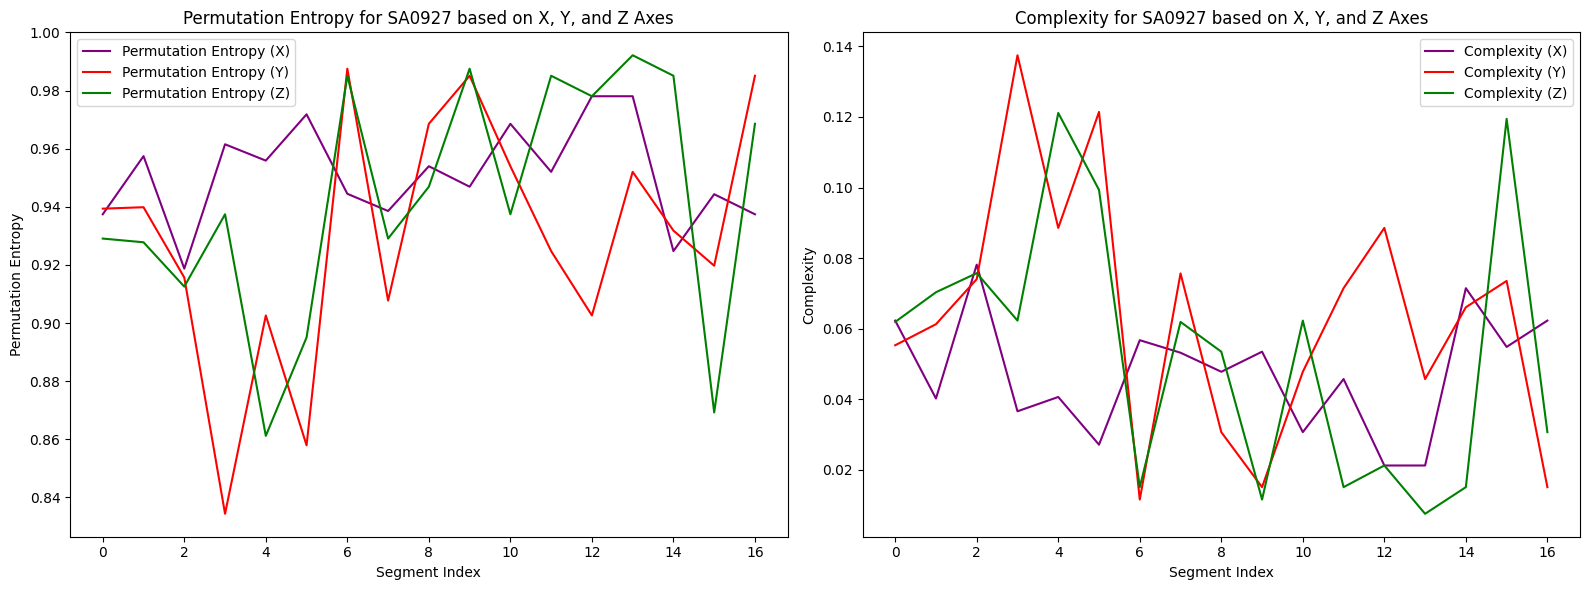

In [177]:
plot_entropy_and_complexity(df_sa, 'SA0927')

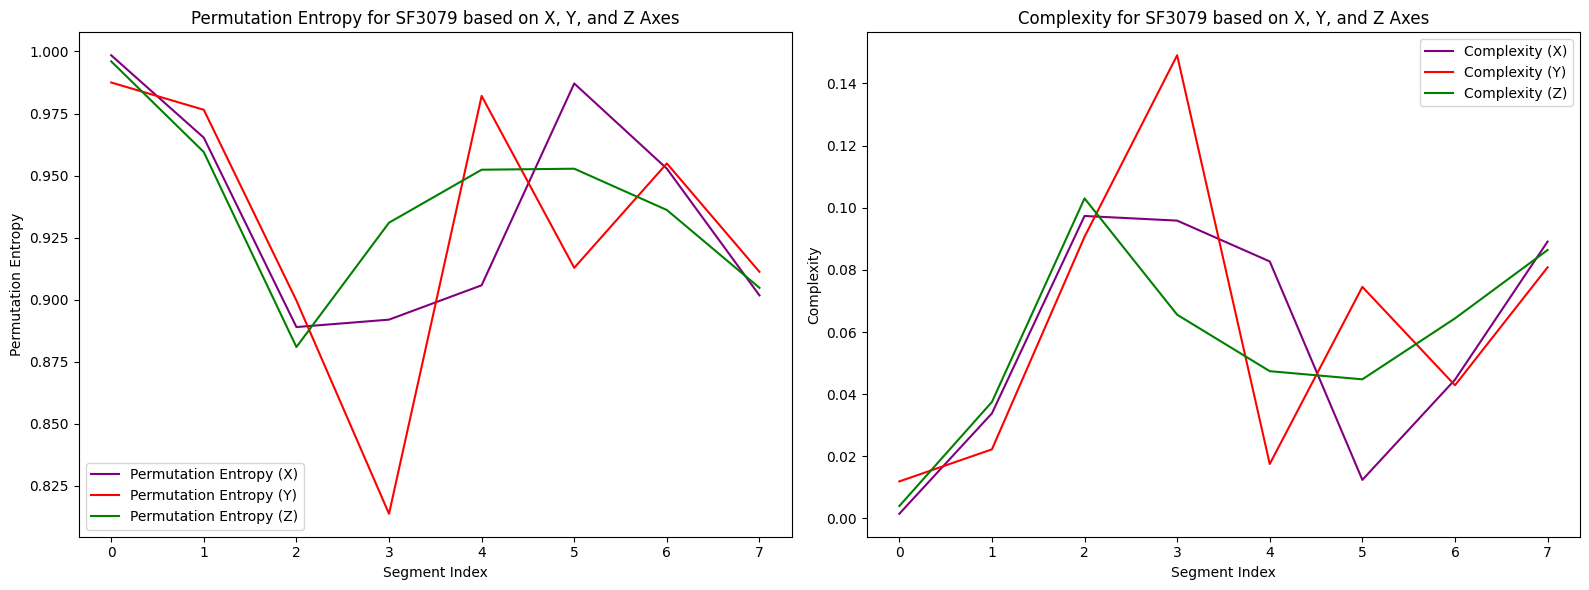

In [239]:
plot_entropy_and_complexity(df_sf, 'SF3079')

Permutation Entropy:

Permutation entropy is a measure of the complexity or irregularity of a time series. It quantifies the predictability of the order or arrangement of values in the time series.


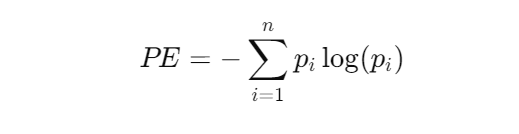

**Complexity Measure:**

Complexity measure is a measure derived from permutation entropy. It quantifies the complexity of a time series by considering the number of possible permutations relative to the observed permutations.

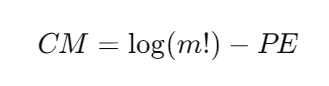